In [1]:
import json
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import numpy as np
from sklearn.metrics import mean_absolute_error
from matplotlib.ticker import ScalarFormatter
import statistics as stat

import proxima_analysis as pa

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

BIG    = 22
MEDIUM = 20
FIGWIDTH=12
WIDTH = 0.25  # the width of the bars
NARROW=0.2

XLINE  = 523.21
YLINE  = 0.002

colors = ['#E27100', '#1b85b8', '#559e83', '#b26167']

# Starting to define standardized colors
MAE_COLOR =colors[1]
TIME_COLOR=colors[0]

FIXED_COLOR  = 'tbd'
STATIC_COLOR = 'tbd'
DYNAMIC_COLOR= 'tbd'

FIXED_MARKER='tbd'
STATIC_MARKER='tbd'
DYNAMIC_MARKER='tbd'

In [2]:

##Running Proxima without reference data (true)
experiments_true = [
    'true-run_rs1',
    'true-run_rs2',
    'true-run_rs3',
    'true-run_rs4',
    'true-run_rs5',
    'true-run_rs6',
    'true-run_rs7',
    'true-run_rs8',
    'true-run_rs9',
    'true-run_rs10',
]

#Running Proxima with reference data
experiments = [
    'dynLns_r1',
    'dynLns_r3',## Need to run dynamic with ref. data, seed =2
    'dynLns_r4',
    'dynLns_r5',
    'dynLns_r6',
    'dynLns_r7',
    'dynLns_r8',
    'dynLns_r9',
    'dynLns_r10',
]

#Running FIXED(0.3,50)
experiment_ss = [
    'ss-true_rs1',
    'ss-true_rs2',
    'ss-true_rs3',
    'ss-true_rs4',
    'ss-true_rs5',
    'ss-true_rs6',
    'ss-true_rs7',
    'ss-true_rs8',
    'ss-true_rs9',
    'ss-true_rs10',
]
root_path = '../proxima_data'

## ROG results of Target function

In [3]:
rog_hf = defaultdict(list)
run_name = 'random-seed_runs/hf_rog'
file = "/".join([root_path, run_name,'result*'])
for f in glob.glob(file):
    control_fn = os.path.basename(f).split('_')
    temp = control_fn[1].split(".json")[0]
    temp = str(int(float(temp)))
    with open(f) as data:
        rog_hf[temp].append(
            json.loads(
                data.read()
            ).get("r_g", None).get("statistic", None)
        )
        
temps = []; rogs_median = []; rogs_std = []
for k, v in rog_hf.items():
    temps.append(float(k))
    rogs_median.append(np.median(v))
    #rogs_median.append(np.mean(v))
    rogs_std.append(np.std(v)/np.sqrt(len(v)-1))

temps, rogs_median, rogs_std = zip(*sorted(zip(temps, rogs_median, rogs_std)))

In [4]:
rog_hf.keys()

dict_keys(['400', '300', '500', '100', '200', '900', '600', '800', '700', '1000'])

## ROG results for true simulations w/ Proxima

In [5]:
rog_dynLns = defaultdict(list)

## True runs - MC simulations not using reference data, running Proxima, lazy training, no surrogate limit
## dynLNS - Proxima, with reference data (lazy training, no surrogate limit)
#run_name = 'random-seed_runs/dynLns_*'
run_name = 'random-seed_runs/true-run*'
dirs = "/".join([root_path, run_name])

for d in glob.glob(dirs):
    
    subdirs = "/".join([d, "*"])
    for s in glob.glob(subdirs):
    
        control_fn = os.path.basename(s).split('_')
        temp = control_fn[6]
        try:
            with open(s + '/result.json') as data:
                rog_dynLns[temp].append(
                    json.loads(
                        data.read()
                    ).get("r_g", None).get("statistic", None)
                )
        except:
            pass

temps_dynLns = []; rogs_dynLns_median = []; rogs_dynLns_std = []
for k, v in rog_dynLns.items():
    temps_dynLns.append(float(k))
    rogs_dynLns_median.append(np.median(v))
    #rogs_dynLns_median.append(np.mean(v))
    rogs_dynLns_std.append(np.std(v)/np.sqrt(len(v)))

temps_dynLns, rogs_dynLns_median, rogs_dynLns_std = zip(
    *sorted(zip(temps_dynLns, rogs_dynLns_median, rogs_dynLns_std))
)

In [6]:
rog_dynLns.keys()

dict_keys(['200', '700', '100', '1000', '300', '900', '500', '800', '600', '400'])

## ROG results for Simple surrogate 
Fixed Parameters - 0.3, 50

In [7]:
rog_SS = defaultdict(list)

## True runs - MC simulations not using reference data, running Proxima, lazy training, no surrogate limit
## dynLNS - Proxima, with reference data (lazy training, no surrogate limit)
#run_name = 'random-seed_runs/dynLns_*'
run_name = 'random-seed_runs/ss-true*'
dirs = "/".join([root_path, run_name])

for d in glob.glob(dirs):
    
    subdirs = "/".join([d, "*"])
    for s in glob.glob(subdirs):
    
        control_fn = os.path.basename(s).split('_')
        temp = control_fn[6]
        try:
            with open(s + '/result.json') as data:
                rog_SS[temp].append(
                    json.loads(
                        data.read()
                    ).get("r_g", None).get("statistic", None)
                )
        except:
            pass

temps_SS = []; rogs_SS_median = []; rogs_SS_std = []
for k, v in rog_SS.items():
    temps_SS.append(float(k))
    #rogs_SS_median.append(np.median(v))
    rogs_SS_median.append(np.mean(v))
    rogs_SS_std.append(np.std(v)/np.sqrt(len(v)))

temps_SS, rogs_SS_median, rogs_SS_std = zip(
    *sorted(zip(temps_SS, rogs_SS_median, rogs_SS_std))
)

In [8]:
rog_SS.keys()

dict_keys(['1000', '700', '400', '800', '600', '200', '900', '500', '100', '300'])

In [9]:
#rogs_SS_median
## Side calculations

In [10]:
good_std = np.std([r for r in rog_dynLns['400'] if r < 0.275])

In [11]:
good_mean = np.median([r for r in rog_dynLns['400'] if r < 0.275])

In [12]:
full_std = np.std([r for r in rog_dynLns['400'] if r < 0.4])
full_mean = np.median([r for r in rog_dynLns['400'] if r < 0.4])

In [13]:
outlier = 0.2784916750097781 
(outlier - full_mean)/full_std

3.3079459184550775

In [14]:
outlier = 0.2784916750097781 
(outlier - good_mean)/good_std

19.618690558621616

In [15]:
mylist = [r for r in rog_dynLns['400'] if r < 0.3]

In [16]:
sorted(mylist)

[0.2736137359693603,
 0.2736287045348181,
 0.2737594994850852,
 0.27376152580691054,
 0.2737999073837394,
 0.27392838512020684,
 0.27394275298367926,
 0.2742383749188642,
 0.2743403945366164,
 0.2784916750097781]

# Median ROG vs Temperature

Text(0, 0.5, 'Median RoG ($\\AA$)')

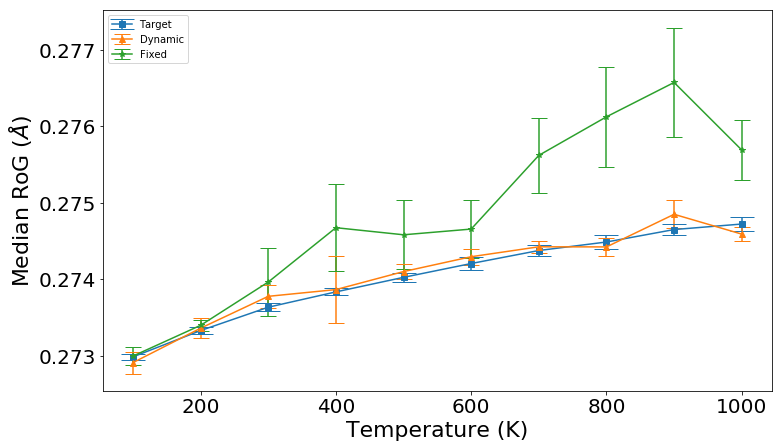

In [17]:
fig, ax = plt.subplots(figsize=(FIGWIDTH,7))

plt.xlabel('Execution time',fontsize=BIG)
plt.ylabel('Mean absolute error', fontsize=BIG)
plt.xticks(fontsize=MEDIUM)
plt.yticks(fontsize=MEDIUM)
ax.yaxis.get_offset_text().set_fontsize(MEDIUM)
ax.errorbar(temps,rogs_median,yerr=rogs_std,label='Target', capsize=12.0, fmt="s-")
ax.errorbar(temps_dynLns,rogs_dynLns_median,yerr=rogs_dynLns_std,label='Dynamic', capsize=8.0, fmt="^-")
ax.errorbar(temps_SS,rogs_SS_median,yerr=rogs_SS_std,label='Fixed', capsize=8.0, fmt="*-")
#ax.errorbar(temps,mean_d,yerr=[d_mins,d_maxes],label='Dynamic', capsize=8.0, fmt="o-")

plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Median RoG ($\AA$)')
#plt.savefig('Figures/meadian_ROG.pdf')
#plt.savefig('Figures/mean_ROG.pdf')

## Mean Time vs Temperature

In [18]:
#root_path_hf = '/home/yzamora/proxima/examples/molecule-sampling'
run_name = 'random-seed_runs/runtime_random-seeds/*'
path_str = '/'.join([root_path,run_name])
temp_hf_data =  defaultdict(list)
rs = defaultdict(list)
for d in glob.glob(path_str):
    hf = pd.read_csv(d).set_index("Temp[K]")
    for i in hf.index:
        temp_hf_data[i].append(float(hf.loc[i]))
        

In [19]:
temps_hf = []; runtime_hf_mean = []; runtime_hf_std = []
for i,k in temp_hf_data.items():
    temps_hf.append(float(i))
    runtime_hf_mean.append(np.mean(k))
    runtime_hf_std.append(np.std(k)/np.sqrt(len(k)))
    
temps_hf, runtime_hf_mean, runtime_hf_std = zip(
    *sorted(zip(temps_hf, runtime_hf_mean, runtime_hf_std))
)

## High Fidelity times dataframe

In [20]:
hf_times = pd.DataFrame(
    {
        "Temp[K]": np.array(temps_hf, dtype="int"),
        "Runtime[s]": runtime_hf_mean
    }
)


# Proxima

## Using Reference data

In [21]:
results = {n: None for n in experiments}
for name in results:
    path_str = "/".join([root_path, 'random-seed_runs',name, "*"])
    path = glob.glob(path_str)
    uq_thresholds, int_list, total_time, uq_time, speed_up = pa.process_times(path,hf_times)
    
    time_df = pa.time_to_df(uq_time)
    speedup_df = pa.speedup_to_df(speed_up)
    #mae_values = pa.process_mae(path)
    mae_values = pa.process_noagregg_mae(path)
    mae_df = pa.mae_to_df(mae_values)
    #results[name] = time_df.merge(mae_df, on=["uq", "interval","temperature"], how="inner")
    time_mae = time_df.merge(mae_df, on=["uq", "interval","temperature"], how="inner")
    results[name]=speedup_df.merge(time_mae, on=["uq", "interval","temperature"], how="inner")

## No reference data

In [22]:
results_true = {n: None for n in experiments_true}
for name in results_true:
    path_str = "/".join([root_path, 'random-seed_runs',name, "*"])
    path = glob.glob(path_str)
    uq_thresholds, int_list, total_time, uq_time, speed_up = pa.process_times(path,hf_times)
    
    time_df = pa.time_to_df(uq_time)
    speedup_df = pa.speedup_to_df(speed_up)
    #mae_values = pa.process_mae(path)
    mae_values = pa.process_noagregg_mae(path)
    mae_df = pa.mae_to_df(mae_values)
    #results[name] = time_df.merge(mae_df, on=["uq", "interval","temperature"], how="inner")
    time_mae = time_df.merge(mae_df, on=["uq", "interval","temperature"], how="inner")
    results_true[name]=speedup_df.merge(time_mae, on=["uq", "interval","temperature"], how="inner")

## Fixed Parameters - 0.3, 50
simple surrogate

In [23]:
results_ss = {n: None for n in experiment_ss}
for name in results_ss:
    path_str = "/".join([root_path, 'random-seed_runs',name, "*"])
    path = glob.glob(path_str)
    uq_thresholds, int_list, total_time, uq_time, speed_up = pa.process_times(path,hf_times)
    
    time_df = pa.time_to_df(uq_time)
    speedup_df = pa.speedup_to_df(speed_up)
    #mae_values = pa.process_mae(path)
    mae_values = pa.process_noagregg_mae(path)
    mae_df = pa.mae_to_df(mae_values)
    #results[name] = time_df.merge(mae_df, on=["uq", "interval","temperature"], how="inner")
    time_mae = time_df.merge(mae_df, on=["uq", "interval","temperature"], how="inner")
    results_ss[name]=speedup_df.merge(time_mae, on=["uq", "interval","temperature"], how="inner")

In [24]:
def summary_speedup(results):
    data_temp = {}
    cols = ["speed_up", "time", "mae"]

    for i,k in results.items():
        data = k.set_index('temperature')
        for t in data.index:

            if t not in data_temp:
                data_temp[t] = defaultdict(list)

            record = data.loc[t]

            for col in cols:
                data_temp[t][col].append(float(record[col]))
    summary = defaultdict(list)
    for i, k in data_temp.items():
        summary["temps"].append(float(i))
        for col in cols:
            summary[col + "_mean"].append(np.mean(k[col]))
            summary[col + "_std"].append(np.std(k[col])/np.sqrt(len(k[col])))

    keys = ["temps"] + [k for k in summary.keys() if k != "temps"]
    result = list(zip(*sorted(zip(*[summary[k] for k in keys]))))
    for i, k in enumerate(keys):
        summary[k] = result[i]
    return summary

In [25]:
summary_with_ref = summary_speedup(results)
summary_no_ref = summary_speedup(results_true)
summary_noref_fixed = summary_speedup(results_ss)

In [26]:
## Harmonic mean of different cases
print('Proxima with reference', stat.harmonic_mean(summary_with_ref['speed_up_mean']))
print('Proxima with no ref. data', stat.harmonic_mean(summary_no_ref['speed_up_mean']))
print('Fixed parameters', stat.harmonic_mean(summary_noref_fixed['speed_up_mean']))


Proxima with reference 2.1493703839392335
Proxima with no ref. data 1.6470570310896486
Fixed parameters 2.331173836677802


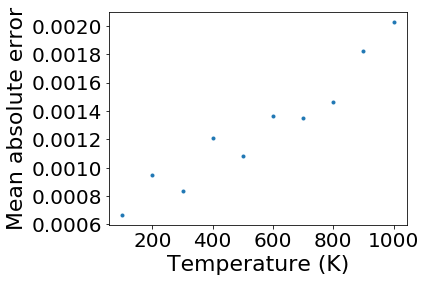

In [27]:
labels = list(summary_no_ref['temps'])
x = np.arange(len(labels)) 
plt.ylabel('Mean absolute error', fontsize=BIG)
plt.xlabel("Temperature (K)", fontsize=BIG)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.get_offset_text().set_fontsize(MEDIUM)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)
plt.xticks(fontsize=MEDIUM)
plt.yticks(fontsize=MEDIUM)
ax.legend(fontsize=BIG)
plt.plot(summary_no_ref['temps'],summary_no_ref['mae_mean'], '.')

plt.tight_layout()

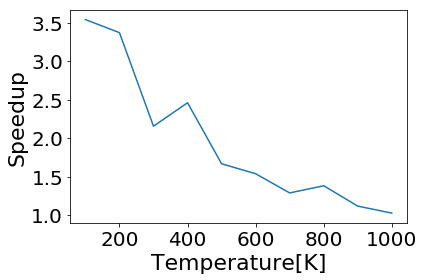

In [28]:
labels = list(summary_no_ref['temps'])
x = np.arange(len(labels)) 
plt.ylabel('Speedup', fontsize=BIG)
plt.xlabel("Temperature[K]", fontsize=BIG)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.get_offset_text().set_fontsize(MEDIUM)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)
plt.xticks(fontsize=MEDIUM)
plt.yticks(fontsize=MEDIUM)
ax.legend(fontsize=BIG)
plt.plot(summary_no_ref['temps'],summary_no_ref['speed_up_mean'])

plt.tight_layout()

## Comparing Speed-ups Proxima versions
Reference data vs no ref. data vs fixed surrogate without reference data

In [29]:
from scipy.stats import sem

def graph_speedup(RI, _speedup_da, _speedup_sa, _speedup_ss300, _speedup_ssnort):
    labels = list(summary_no_ref['temps'])

    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(FIGWIDTH,5))
    
    #find error
    
    rects1 = ax.bar(x - WIDTH/2, list(_speedup_da), WIDTH,yerr=sem(list(_speedup_da)), label='Ref Data')
    rects2 = ax.bar(x + WIDTH/2, list(_speedup_sa), WIDTH,yerr=sem(list(_speedup_sa)), label='No Ref Data')
    if RI:
        rects3 = ax.bar(x + (WIDTH/2)+WIDTH, list(_speedup_ss300), WIDTH,yerr=sem(list(_speedup_ss300)), label=r'Fixed, $T$=0.3, $RI$=50')
    else:
        rects3 = ax.bar(x + (WIDTH/2)+WIDTH, list(_speedup_ssnort), WIDTH,yerr=sem(list(_speedup_ssnort)), label=r'Fixed, $T$=0.3, $RI$=50')

    ax.set_ylabel('Speedup', fontsize=BIG)
    ax.set_xlabel('Temperature (K)', fontsize=BIG)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(fontsize=MEDIUM)
    plt.yticks(fontsize=MEDIUM)
    ax.legend(fontsize=BIG)
    plt.tight_layout()

    """if RI:
        plt.savefig('Figures/speedup_best.pdf')
    else:
        plt.savefig('Figures/nort_speedup_bar.pdf')"""

    plt.show()

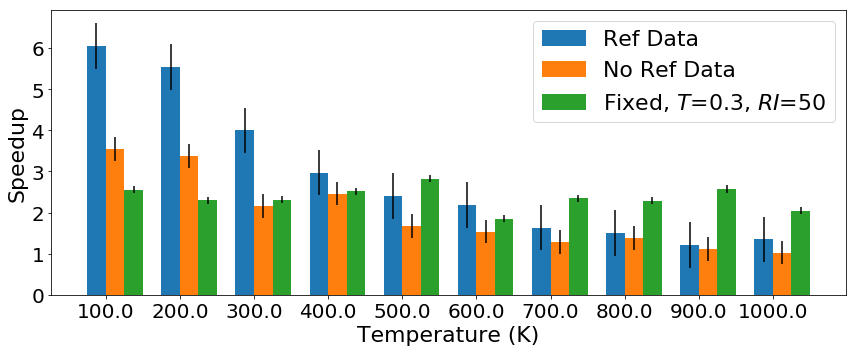

In [30]:
graph_speedup(False, summary_with_ref['speed_up_mean'], summary_no_ref['speed_up_mean'], None,summary_noref_fixed['speed_up_mean'])

## Speedups of Proxima vs Fixed
No Reference data

In [69]:

summary_no_ref['speed_up_std'] + (13,)

(0.26979029078156236,
 0.22314632867246548,
 0.1428656571748438,
 0.35142348953933056,
 0.05918847860859409,
 0.10750750671464762,
 0.11725031343241686,
 0.114046784259794,
 0.1109701941964598,
 0.10873980411974263,
 13)

In [116]:
def graph_speedup(RI, _speedup_da, _speedup_sa, _speedup_ss300, _speedup_ssnort):
    labels = list(summary_no_ref['temps'] + ('HM',))

    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(FIGWIDTH,5))
    
    #calculating harmonic mean
    hm_prox = stat.harmonic_mean(_speedup_da['speed_up_mean'])
    hm_fixed = stat.harmonic_mean(_speedup_sa['speed_up_mean'])
    speedup_prox = list(_speedup_da['speed_up_mean'] + (hm_prox,))
    speedup_fixed = list(_speedup_sa['speed_up_mean'] + (hm_fixed,))
    
    std_prox_hm = _speedup_da['speed_up_std'] + (stat.harmonic_mean(_speedup_da['speed_up_std']),)
    std_fixed_hm = _speedup_da['speed_up_std'] + (stat.harmonic_mean(_speedup_sa['speed_up_std']),)
    
    rects1 = ax.bar(x - WIDTH/2, speedup_prox, WIDTH,yerr=std_prox_hm, label='Proxima - No Ref. Data')
    rects2 = ax.bar(x + WIDTH/2, speedup_fixed, WIDTH,yerr=std_fixed_hm ,label='Fixed - No Ref. Data')

    
    ax.plot([-5,10.5],[1,1],"k--")
    ax.set_xlim([-0.5, 10.5])
    ax.set_ylabel('Speedup', fontsize=BIG)
    ax.set_xlabel('Temperature (K)', fontsize=BIG)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(fontsize=MEDIUM)
    plt.yticks(fontsize=MEDIUM)
    ax.legend(fontsize=BIG)
    plt.tight_layout()

    """if RI:
        plt.savefig('Figures/speedup_best.pdf')
    else:
        plt.savefig('Figures/nort_speedup_bar.pdf')"""
    plt.savefig('Figures/speedup_noref.pdf')
    plt.show()

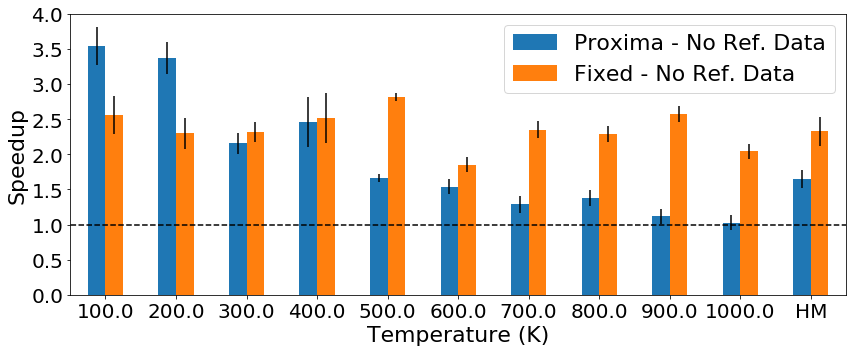

In [117]:
graph_speedup(False, summary_no_ref,summary_noref_fixed ,None, None)

In [33]:
np.mean(summary_no_ref['speed_up_mean'])

1.9540799999999998

## MAE of results

In [113]:
def mae_results(summary1,summary2):
    RI= True #set true or false depending on retrain interval usage
    SS = False #Comparing with simple surrogate
    labels = list(summary1['temps'] + ('HM',))
    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(FIGWIDTH,5))
    
    #calculating harmonic mean
    hm_prox = stat.harmonic_mean(summary1['mae_mean'])
    hm_fixed = stat.harmonic_mean(summary2['mae_mean'])
    mae_prox = list(summary1['mae_mean'] + (hm_prox,))
    mae_fixed = list(summary2['mae_mean'] + (hm_fixed,))
    
    std_prox_hm = summary1['mae_std'] + (stat.harmonic_mean(summary1['mae_std']),)
    std_fixed_hm = summary2['mae_std']+ (stat.harmonic_mean(summary2['mae_std']),)
    
    rects1 = ax.bar(x - WIDTH/2, mae_prox, WIDTH,yerr=std_prox_hm, label=r'Proxima - no Ref. Data')
    rects2 = ax.bar(x + WIDTH/2, mae_fixed, WIDTH, yerr=std_fixed_hm,label='Fixed - no Ref. Data')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Energy MAE (eV)', fontsize=BIG)
    ax.set_xlabel("Temperature (K)", fontsize=BIG)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    
    ax.plot([-5,10.5],[0.002,0.002],"k--")
    ax.set_xlim([-0.5, 10.5])
    ax.yaxis.get_offset_text().set_fontsize(MEDIUM)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)
    plt.xticks(fontsize=MEDIUM)
    plt.yticks(fontsize=MEDIUM)
    ax.legend(fontsize=BIG)
    plt.tight_layout()
    plt.savefig('Figures/surgOnly_MAE_noref.pdf')

In [118]:
np.mean(summary_no_ref['mae_mean'])
len(summary_no_ref['mae_std'] + (stat.harmonic_mean(summary_no_ref['mae_std']),))
len(summary_no_ref['mae_mean'] + (stat.harmonic_mean(summary_no_ref['mae_mean']),))
summary_noref_fixed['mae_mean']

(0.0005401458378971706,
 0.0011999735669670877,
 0.0010108560691427446,
 0.001599934236848518,
 0.00187162403713479,
 0.0015852547017448666,
 0.0022836514915925963,
 0.0023308298539454534,
 0.002792925200199681,
 0.0031144561299025608)

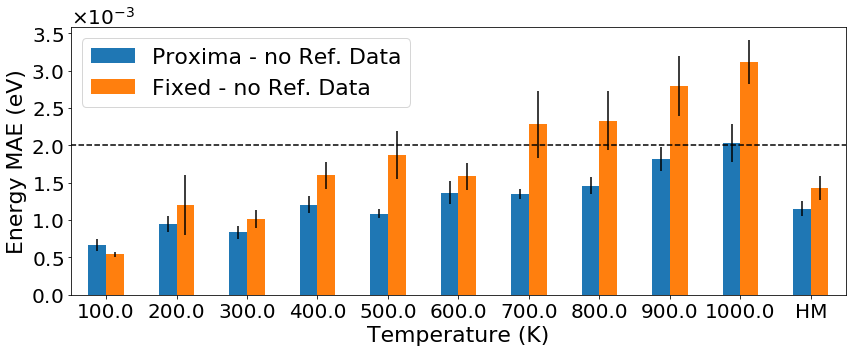

In [115]:
mae_results(summary_no_ref,summary_noref_fixed)

In [37]:
def ROG_mae_results(summary1,summary2):
    RI= True #set true or false depending on retrain interval usage
    SS = False #Comparing with simple surrogate

    x = np.arange(len(labels))  # the label locations
    fig, ax = plt.subplots(figsize=(FIGWIDTH,5))

    rects1 = ax.bar(x - WIDTH/2, list(summary1['mae_mean']), WIDTH,label=r'Proxima - no Ref. Data')
    rects2 = ax.bar(x + WIDTH/2, list(summary2['mae_mean']), WIDTH,label='Fixed - no Ref. Data')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Mean absolute error', fontsize=BIG)
    ax.set_xlabel("Temperature (K)", fontsize=BIG)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.yaxis.get_offset_text().set_fontsize(MEDIUM)
    ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), useMathText=True)
    plt.xticks(fontsize=MEDIUM)
    plt.yticks(fontsize=MEDIUM)
    ax.legend(fontsize=BIG)
    plt.tight_layout()
    #plt.savefig('Figures/3prox_MAEbar.pdf')

In [38]:
temp_rg = rog_hf.keys()

In [39]:
pd.DataFrame({'Temperature': [k for k in temp_rg]})
# k for k in rog_hf.keys() if k != "list"

,Temperature
0,400
1,300
2,500
3,100
4,200
5,900
6,600
7,800
8,700
9,1000


In [40]:
#rog_summary = pd.DataFrame(k for k in rog_hf.keys() if k != "list")
rog_summary = pd.DataFrame({'Temperature': [k for k in rog_hf.keys()]})
for name, d in [('Dynamic',rog_dynLns), ('Target',rog_hf), ('Fixed',rog_SS)]:
    col_m = []; col_s = []
    
    for T in rog_summary['Temperature']:
        col_m.append(np.mean(d[T]))
        col_s.append(np.std(d[T])/np.sqrt(len(d[T])))
    #import pdb; pdb.set_trace()
    rog_summary[f"{name}_mean"] = col_m
    rog_summary[f"{name}_stderr"] = col_s

In [41]:
rog_summary['T'] = rog_summary['Temperature'].astype('int')
rog_summary = rog_summary.sort_values('T')

Text(0, 0.5, 'ROG MEAN ($\\AA$)')

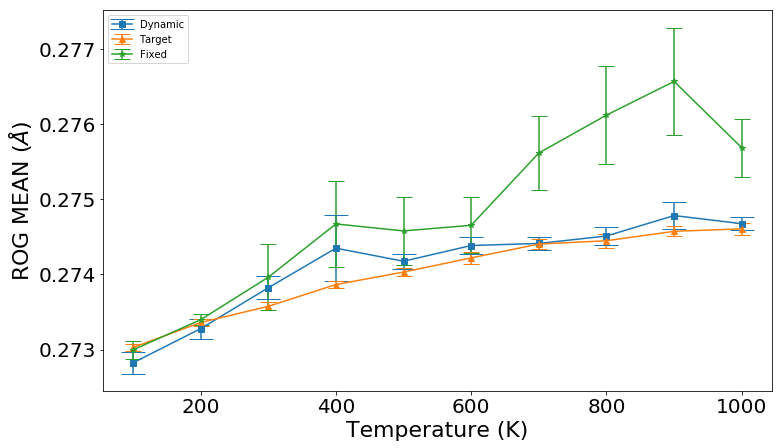

In [42]:
fig, ax = plt.subplots(figsize=(FIGWIDTH,7))

plt.xlabel('Execution time',fontsize=BIG)
plt.ylabel('Mean absolute error', fontsize=BIG)
plt.xticks(fontsize=MEDIUM)
plt.yticks(fontsize=MEDIUM)
ax.yaxis.get_offset_text().set_fontsize(MEDIUM)

ax.errorbar(rog_summary['T'],rog_summary['Dynamic_mean'],yerr=rog_summary['Dynamic_stderr'],label='Dynamic', capsize=12.0, fmt="s-")
ax.errorbar(rog_summary['T'],rog_summary['Target_mean'],yerr=rog_summary['Target_stderr'],label='Target', capsize=8.0, fmt="^-")
ax.errorbar(rog_summary['T'],rog_summary['Fixed_mean'],yerr=rog_summary['Fixed_stderr'], label='Fixed',capsize=8.0, fmt="*-")

"""ax.errorbar(rog_summary['T'],rog_summary['Dynamic_mean'],label='Dynamic', capsize=12.0, fmt="s-")
ax.errorbar(rog_summary['T'],rog_summary['Target_mean'],label='Target', capsize=8.0, fmt="^-")
ax.errorbar(rog_summary['T'],rog_summary['Fixed_mean'], label='Fixed',capsize=8.0, fmt="*-")"""
#ax.errorbar(temps,mean_d,yerr=[d_mins,d_maxes],label='Dynamic', capsize=8.0, fmt="o-")

plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('ROG MEAN ($\AA$)')
#plt.savefig('~/Desktop/mean_ROG.pdf')
#plt.savefig('Figures/mean_ROG.pdf')

## GETTING MAE

In [43]:
#rog_summary = pd.DataFrame(k for k in rog_hf.keys() if k != "list")
rog_summary = pd.DataFrame({'Temperature': [k for k in rog_hf.keys()]})

for name, d in [('Target',rog_hf)]:
    col_m = []; col_s = []
    
    for T in rog_summary['Temperature']:
        col_m.append(np.mean(d[T]))
        col_s.append(np.std(d[T])/np.sqrt(len(d[T])))
    #import pdb; pdb.set_trace()
    rog_summary[f"{name}_mean"] = col_m
    #rog_summary[f"{name}_stderr"] = col_s

rog_summary["T"] = rog_summary['Temperature']
rog_summary = rog_summary.set_index("T") 
for name, d in [('Dynamic',rog_dynLns), ('Fixed',rog_SS)]:
    col_m = []; col_s = []
    for T in rog_summary['Temperature']:
        
        #import pdb; pdb.set_trace()
        size = len(d[T])
        dT = np.array(d[T])
        ref = np.array([rog_summary["Target_mean"].loc[T]] * size)
        
        ae = abs(dT - ref) / ref
        
        col_m.append(np.mean(ae))
        col_s.append(np.std(ae)/np.sqrt(size))
    #import pdb; pdb.set_trace()
    rog_summary[f"{name}_mae"] = col_m
    rog_summary[f"{name}_stderr"] = col_s

In [44]:
rog_summary.reset_index(drop=False,inplace=True)
rog_summary['T'] = rog_summary['Temperature'].astype('int')
rog_summary = rog_summary.sort_values('T')

Text(0, 0.5, 'ROG MAE ($\\AA$)')

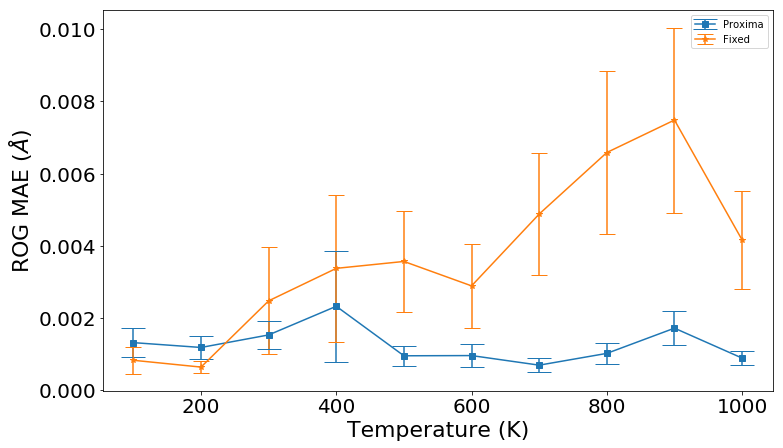

In [45]:
fig, ax = plt.subplots(figsize=(FIGWIDTH,7))

plt.xlabel('Execution time',fontsize=BIG)
plt.ylabel('Mean absolute error', fontsize=BIG)
plt.xticks(fontsize=MEDIUM)
plt.yticks(fontsize=MEDIUM)
ax.yaxis.get_offset_text().set_fontsize(MEDIUM)
ax.errorbar(rog_summary['T'],rog_summary['Dynamic_mae'],yerr=rog_summary['Dynamic_stderr'],label='Proxima', capsize=12.0, fmt="s-")
#ax.errorbar(rog_summary['T'],rog_summary['Target_mae'],yerr=rog_summary['Target_stderr'],label='Target', capsize=8.0, fmt="^-")
ax.errorbar(rog_summary['T'],rog_summary['Fixed_mae'],yerr=rog_summary['Fixed_stderr'], label='Fixed',capsize=8.0, fmt="*-")
#ax.errorbar(temps,mean_d,yerr=[d_mins,d_maxes],label='Dynamic', capsize=8.0, fmt="o-")

plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('ROG MAE ($\AA$)')
#plt.savefig('Figures/MAE_ROG.pdf')

In [46]:
rog_summary['Dynamic_mae']

3    0.001323
4    0.001189
1    0.001536
0    0.002329
2    0.000959
6    0.000965
8    0.000699
7    0.001025
5    0.001724
9    0.000895
Name: Dynamic_mae, dtype: float64

In [47]:
## MAE - the mean of the absolute error of each trial compared to the mean of the target 
## MEAN ROG - comparing the average of ROG all trials
## MEDIAN ROG - looking at median of results to reduce effects of outliers

In [48]:
## Showing that Dynamic is capturing dynamic ROG and FIXED is not. 